In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df= pd.read_csv('./drive/My Drive/Final_games.csv')

In [182]:
df

,editors_choice,game_types,comments,price,updated,size,required_android,content_rating,game_features,interactive_elements,in_app_products_avg,has_website,stars
0,0,arcade,157483,12100,2019,7,7,18,1,0,0,1,2
1,0,racing,23326,1000,2016,37,4,3,0,1,10500,1,1
2,1,arcade,3795238,47956,2020,68,4,7,2,1,203740,1,2
3,0,simulation,70448,2900,2020,60,4,3,0,1,133400,1,2
4,1,action,835484,3000,2020,48,4,18,1,2,203877,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,roleplaying,61898,0,2020,81,4,12,3,2,453950,1,2
595,1,strategy,60384,0,2020,104,5,12,1,2,1303750,1,2
596,1,adventure,736760,0,2020,68,4,7,1,1,351424,1,2
597,1,casual,3453485,0,2020,78,4,3,0,3,397750,1,3


In [183]:
from sklearn.preprocessing import LabelEncoder

In [184]:
df['game_types'] = LabelEncoder().fit_transform(df['game_types'])

In [185]:
import sklearn 
from sklearn.model_selection import train_test_split

In [186]:
X=df.drop(['editors_choice'],axis=1)              
Y=df['editors_choice'] 

In [187]:
X.columns

Index(['game_types', 'comments', 'price', 'updated', 'size',
       'required_android', 'content_rating', 'game_features',
       'interactive_elements', 'in_app_products_avg', 'has_website', 'stars'],
      dtype='object')

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [189]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [190]:
tree_clf = tree.DecisionTreeClassifier ()
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [191]:
tree_clf.score(X_test,Y_test)

0.775

In [192]:
tree_params = {'max_depth':np.arange(3,6,1),'criterion':['entropy','gini']}
tree_search = GridSearchCV(tree_clf,tree_params,scoring='accuracy')        # make it randomized 
tree_search.fit(X_train,Y_train)
tree_best_params = tree_search.best_params_

In [193]:
tree_optimized = tree.DecisionTreeClassifier(criterion = tree_best_params['criterion'], max_depth = tree_best_params['max_depth'])
tree_optimized.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
tree_optimized.score(X_test,Y_test)

0.8166666666666667

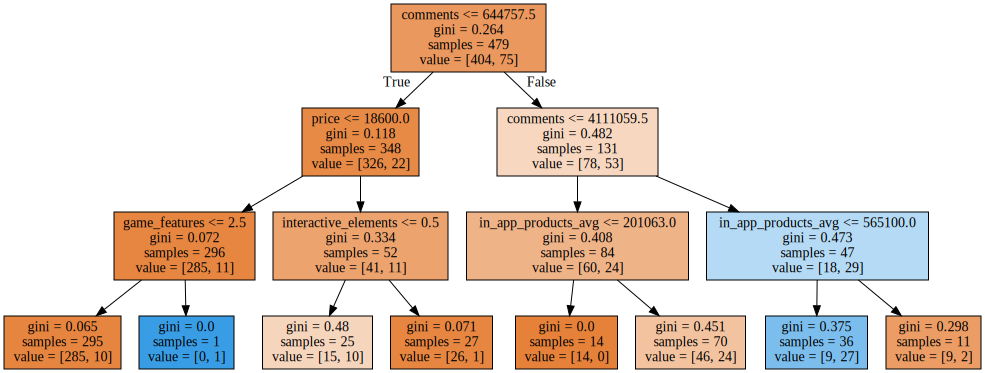

In [195]:
dot_data = export_graphviz(tree_optimized,feature_names=X.columns,filled=True)
graphviz.Source(dot_data)

In [196]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, Y_train)
xgb.score(X_test,Y_test)

0.8166666666666667

In [197]:
from sklearn import linear_model              
lm = linear_model.SGDClassifier(loss="hinge", penalty="l2")
lm.fit(X_train, Y_train)
lm.score(X_train,Y_train)

0.7640918580375783

In [204]:
lm_params = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"],"alpha": np.arange(0.0001,0.001,0.001) ,"penalty" : ["l2", "l1", "none"],"max_iter":(np.arange(100,1000,100))}
lm_search = GridSearchCV(lm_model, param_grid=lm_params)
lm_search.fit(X_train,Y_train)
lm_best_params = lm_search.best_params_

In [205]:
lm_optimized = linear_model.SGDClassifier(loss=lm_best_params['loss'],penalty=lm_best_params['penalty'])
lm_optimized.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [206]:
lm_optimized.score(X_test,Y_test)

0.7583333333333333

In [207]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, Y_train)
svm.score(X_train,Y_train)

0.8559498956158664

In [208]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_test,Y_test)

0.8416666666666667